In [2]:
!mkdir -p aiffel/time_series_basic 
!cp data/AirPassengers.csv aiffel/time_series_basic/

In [3]:
!pip install arch==6.3.0

In [4]:
import scipy
print(scipy.__version__)

1.9.3


In [5]:
pip install scipy==1.9.3

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 82.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 KB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 85.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 KB 31.4 MB/s eta 0:00:00
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.2
    Uninstalling patsy-0.5.2:
      Successfully uninstalled patsy-0.5.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.3
    Uninstalling pandas-1.3.3:
      Successfully uninstalled pandas-1.3.3
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.0
    Uninstalling statsmodels-0.13.0:
      Successfully uninstalled statsmodels-0.13.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [3]:
ap = pd.read_csv('/aiffel/aiffel/time_series_basic/AirPassengers.csv')
ap.drop('Month', axis = 1, inplace = True)

In [4]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


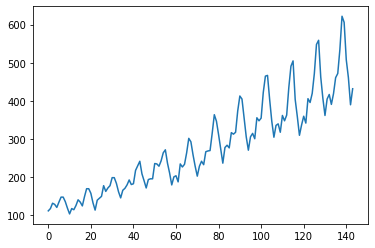

In [5]:
plt.plot(ap)
plt.show()

In [6]:
ap_transformed = np.log(ap)

In [8]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


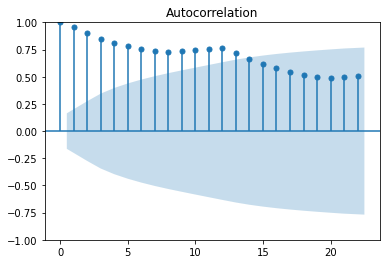

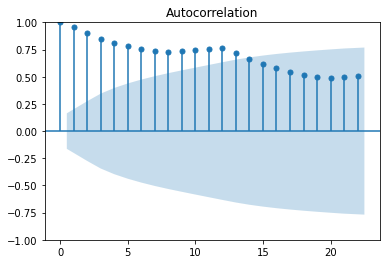

In [9]:
plot_acf(ap_transformed)

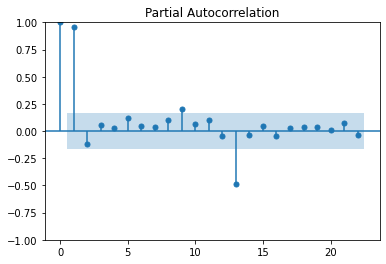

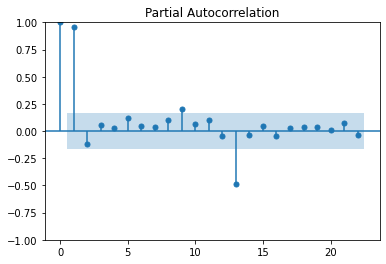

In [10]:
plot_pacf(ap_transformed)

In [11]:
ap_diffed = ap_transformed.diff().dropna()

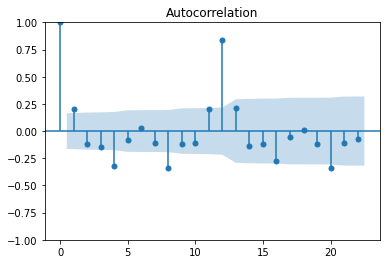

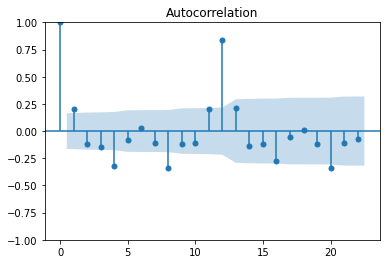

In [12]:
plot_acf(ap_diffed)

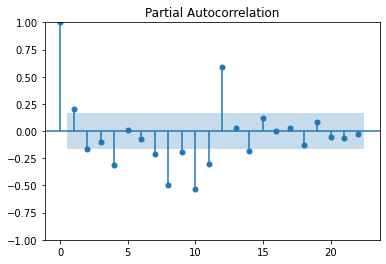

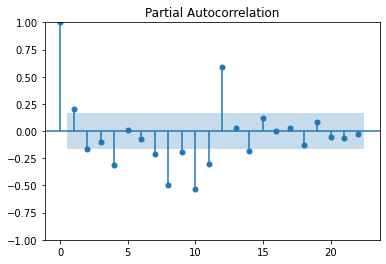

In [13]:
plot_pacfb

In [15]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


In [19]:
train_size = int(len(ap_transformed)* 0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

In [20]:
#AutoARIMA
# seasonal = True, max_D = 12
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12)
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-213.916, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.555, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-214.724, Time=0.43 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-218.097, Time=0.57 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=0.29 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-219.339, Time=0.65 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, Time=0.54 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-214.826, Time=0.72 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=i

In [24]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape) 
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
# print('--'*40)
# print(preds)
# print('--'*40)
# print(conf_int)

(29,)
<class 'numpy.ndarray'>
--------------------------------------------------------------------------------
29
<class 'int'>


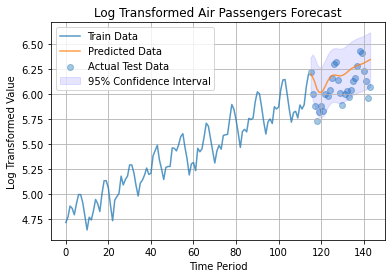

In [28]:
# 예측 성능을 시각화합니다.
# 0. train과 test data를 축(axis)으로 만들었습니다.
# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.

# x축 생성 (길이를 명확히 하기 위해 len() 사용)
x_axis = np.arange(len(ap_transformed_train) + len(preds)) # 0

# 1. 훈련 데이터 시각화 (Pandas 객체라면 .values 사용)
plt.plot(x_axis[:len(ap_transformed_train)], ap_transformed_train.values if hasattr(ap_transformed_train, 'values') else ap_transformed_train, alpha=0.75, label='Train Data')

# 2. 예측값 시각화 (preds는 이미 NumPy 배열일 가능성이 높지만, 일관성을 위해 .values 확인 가능)
plt.plot(x_axis[len(ap_transformed_train):], preds.values if hasattr(preds, 'values') else preds, alpha=0.75, label='Predicted Data')

# 3. 실제 테스트 데이터 시각화 (Pandas 객체라면 .values 사용)
plt.scatter(x_axis[len(ap_transformed_train):], ap_transformed_test.values if hasattr(ap_transformed_test, 'values') else ap_transformed_test,
            alpha=0.4, marker='o', label='Actual Test Data')

# 4. 신뢰 구간 시각화 (conf_int는 이미 NumPy 배열일 가능성이 높음)
plt.fill_between(x_axis[-len(preds):],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b', label='95% Confidence Interval')

plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.xlabel("Time Period") # x축 레이블 추가
plt.ylabel("Log Transformed Value") # y축 레이블 추가
plt.legend() # 범례 추가
plt.grid(True) # 그리드 추가 (선택 사항)
plt.show() # 4개의 plot을 시각화 합니다.


In [33]:
# 터미널 또는 주피터 노트북 셀에서 실행
!pip install --upgrade arch pandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 986.1/986.1 KB 18.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 81.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 KB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 62.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 69.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
  Attempting uninstall: arch
    Found existing installation: arch 6.3.0
    Uninstalling arch-6.3.0:
      Successfully uninstalled arch-6.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that ar

In [ ]:
import os
os.kill(os.getpid(), 9)

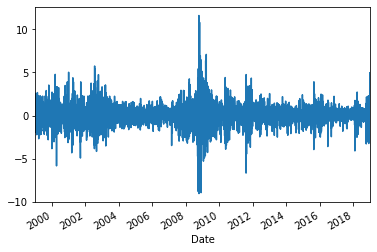

In [1]:
import datetime as dt
import arch.data.sp500

st = dt.datetime(2002,1,1)
ed = dt.datetime(2022,1,1)
data = arch.data.sp500.load()
market =  data["Adj Close"]
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())


In [2]:
from arch import arch_model

am = arch_model(returns)
res = am.fit(update_freq = 5)
print(res.summary())
# 다양한 결과가 제시되어있으나, 수업때 배웠던 p-value, AIC, BIC위주로 내용을 파악
# 아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며, p-value를 통해 신뢰도 95%에서 이들이 유의미함을 도출

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Mon, May 26 2025   Df Residuals:                     5029
Time:         

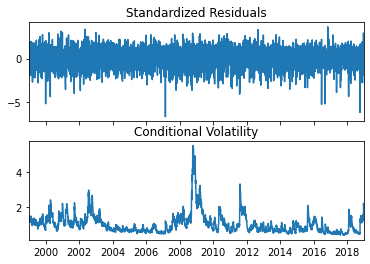

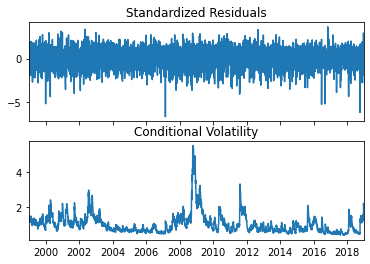

In [3]:
res.plot()